# New house registration in Ireland

Abstract: 

The aim of this analysis is to assess the components of the 
time series of the New House Registration dataset, implement 
some models, run the relevant diagnostic tests and choose the 
best model. From the models the forecasting will be executed 
with illustrative graphics and an assessment of the best model 
will be provided. 

Conclusion:

In this analysis we run 3 predictive models:
- Mean model.
- Exponential smoothing model.
- Arima model (auto version).
The mean model needs to be excluded because the 
distribution of the errors is not normal and the MAE is really 
too high (14062.6507936508).
The remaining models, have a normal distribution of the 
residuals, except for some outliers that we expected because 
we have included in the model the whole dataset. 
However, the Autoarima model has a smaller MAE and a 
RMSE and for this reason is the model chosen.


In [ ]:
house <- read.csv('NewHouseRegistrations_Ireland.csv')

In [12]:
head(house)

,ï..Year,NewHouseRegistrations
,<int>,<int>
1,1978,3781
2,1979,5565
3,1980,9609
4,1981,10785
5,1982,9448
6,1983,10830


In [13]:
colnames(house)[1] <- "year"

In [14]:
head(house)

,year,NewHouseRegistrations
,<int>,<int>
1,1978,3781
2,1979,5565
3,1980,9609
4,1981,10785
5,1982,9448
6,1983,10830


In [15]:
tshouse<-ts(house['NewHouseRegistrations'], start=1978, frequency=1)

In [16]:
head(tshouse)

NewHouseRegistrations
3781
5565
9609
10785
9448
10830


In [17]:
end(tshouse)

[1] 2019    1

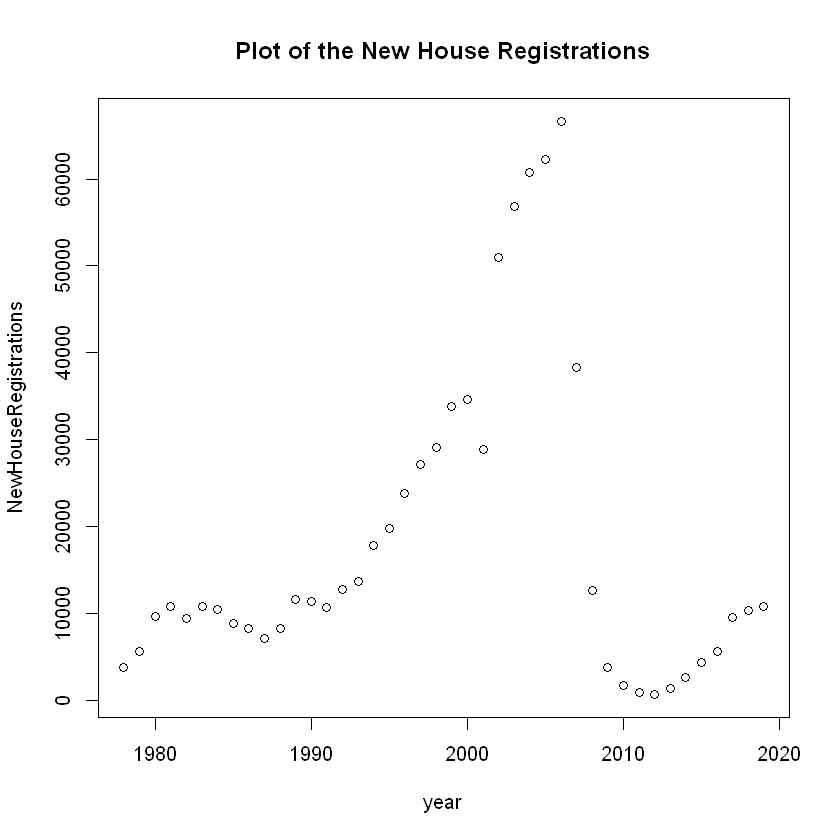

In [18]:
plot(house, main="Plot of the New House Registrations")

# fino al 2007

In [19]:
fhouse <- house[ house$year <2007, ]

In [20]:
fhouse<-fhouse['NewHouseRegistrations']

In [21]:
fhouse <- ts(fhouse, start=c(1978), frequency=1)

In [22]:
class(fhouse)                                             

[1] "ts"

In [23]:
start(fhouse)

[1] 1978    1

In [24]:
end(fhouse)

[1] 2006    1

In [25]:
frequency(fhouse)

[1] 1

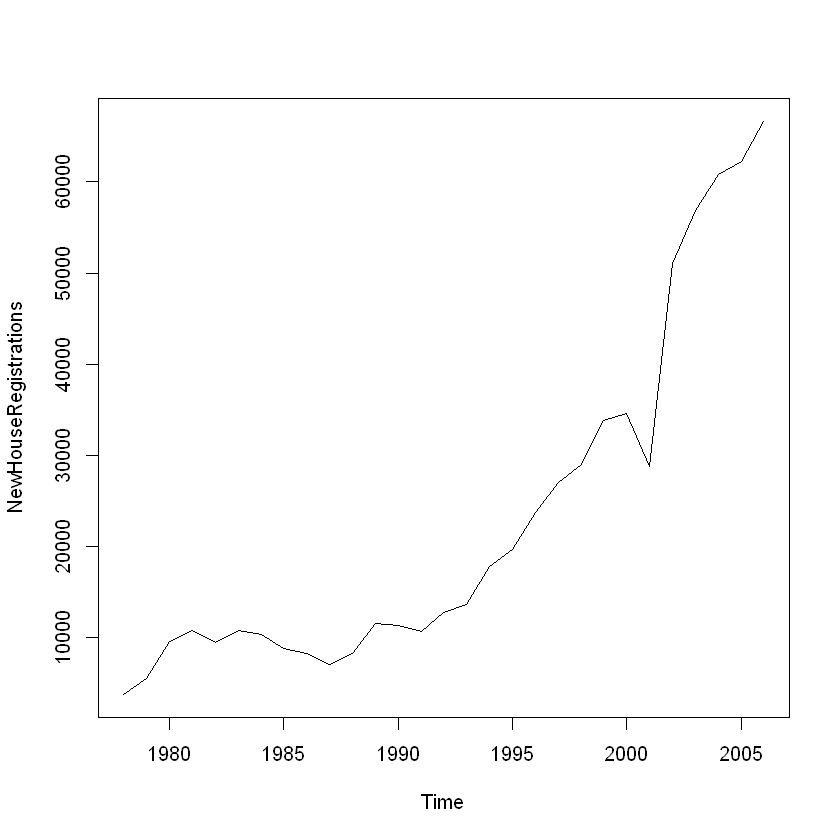

In [26]:
plot(fhouse)

The boxplot per year shows us the pattern of the yearly cycle (**Note:** `cycle` is a utility that numbers the data items cyclic according to frequency)

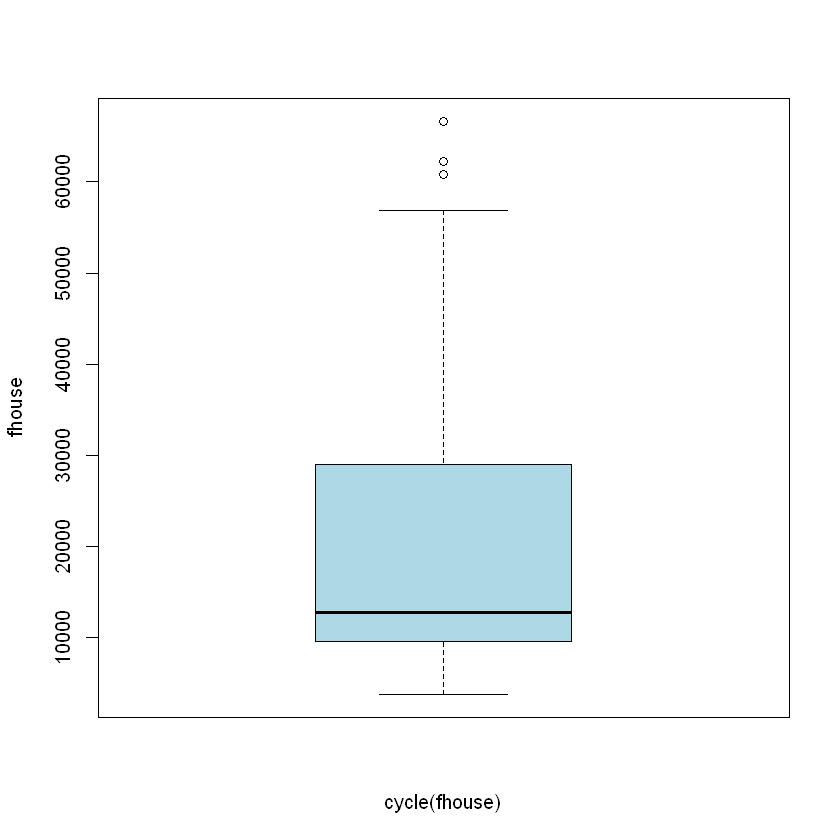

In [27]:
boxplot(fhouse~cycle(fhouse), col='lightblue')

The boxplot per year gives us a summary of the trend over the years. (**Note:** Time is a floating point variable that interpolates the time interval between the years. `floor` cuts it down to the actual year.)

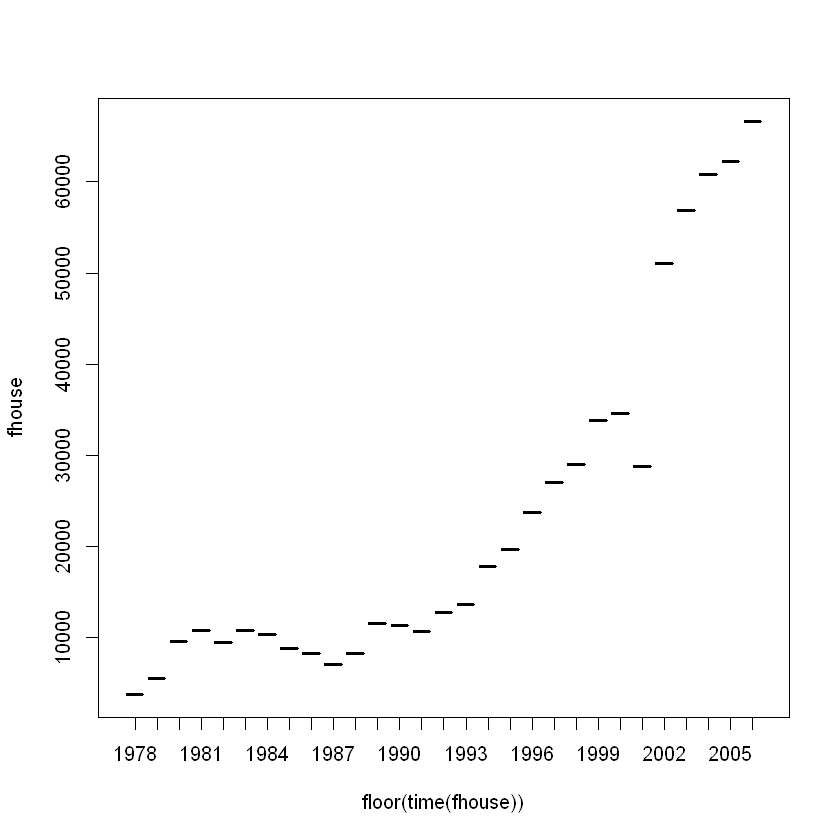

In [28]:
boxplot(fhouse~floor(time(fhouse)), col='lightblue') 

# Fine paragrafo fino al 2007 forse da cancellare

# Seasonal Plots

In [19]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 4.0.4"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.3     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  

Warning message:
"package 'ggplot2' was built under R version 4.0.4"
Warning message:
"package 'forecast' was built under R version 4.0.4"
Warning message:
"package 'fma' was built under R version 4.0.4"
Warning message:
"package 'expsmooth' was built under R version 4.0.4"




In [20]:
ggseasonplot(tshouse, year.labels=TRUE, years.labels.left=TRUE)
    ylab('registrations')
    ggtitle('Seasonal Plot: house')
# Or simply seasonplot(house)

ERROR: Error in ggseasonplot(tshouse, year.labels = TRUE, years.labels.left = TRUE): Data are not seasonal


In [ ]:
seasonplot(tshouse)

# Seasonal subseries plots

In [21]:
ggsubseriesplot(tshouse)
    ylab('Trips')
    ggtitle('Seasonal subseries plot: Trips')
# or simply monthplot(trips)

ERROR: Error in ggsubseriesplot(tshouse): Data are not seasonal


# Seasonal Decomposition using Decompose multiplicative

In [22]:
fit.decmult<-decompose(tshouse,type='additive')
#fit.decmult
#plot(fit.decmult)

# We use the multiplicative decomposition because the size of the fluttuation in 2020 is higher than i 2012

ERROR: Error in decompose(tshouse, type = "additive"): time series has no or less than 2 periods


# Forecasting Using Mean Model

In [29]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 4.0.4"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.3     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  

Warning message:
"package 'ggplot2' was built under R version 4.0.4"
Warning message:
"package 'forecast' was built under R version 4.0.4"
Warning message:
"package 'fma' was built under R version 4.0.4"
Warning message:
"package 'expsmooth' was built under R version 4.0.4"




In [30]:
fcast.mean<-meanf(tshouse,h=3)
fcast.mean

     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2020       18275.33 -5578.056 42128.72 -18708.38 55259.05
2021       18275.33 -5578.056 42128.72 -18708.38 55259.05
2022       18275.33 -5578.056 42128.72 -18708.38 55259.05

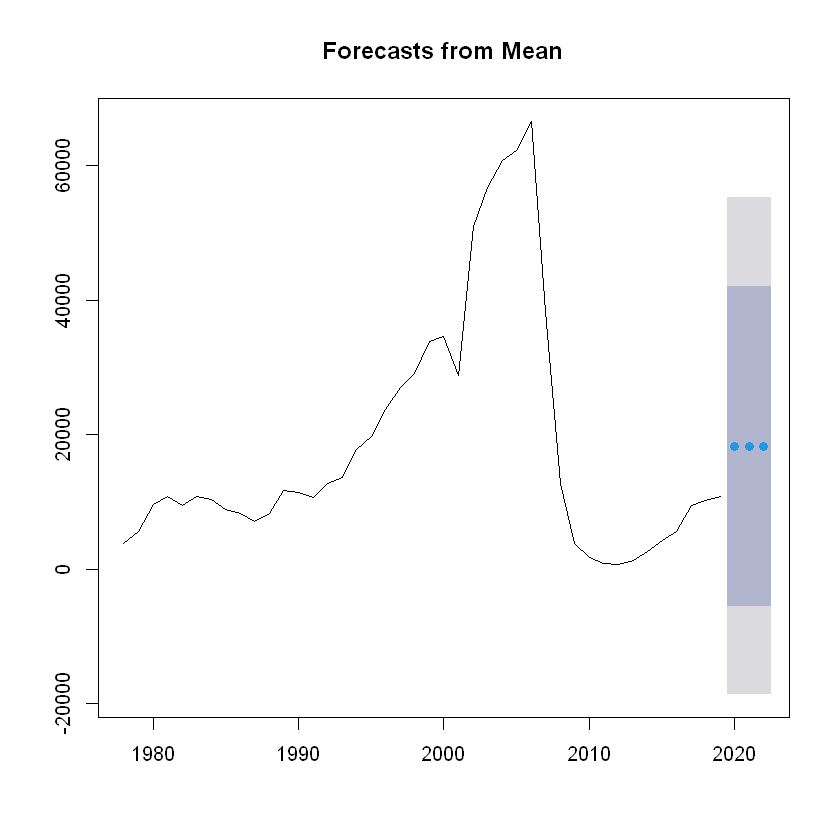

In [25]:
plot(fcast.mean)

In [26]:
summary(fcast.mean)


Forecast method: Mean

Model Information:
$mu
[1] 18275.33

$mu.se
[1] 2792.696

$sd
[1] 18098.74

$bootstrap
[1] FALSE

$call
meanf(y = tshouse, h = 3)

attr(,"class")
[1] "meanf"

Error measures:
                       ME     RMSE      MAE       MPE     MAPE    MASE
Training set 1.559007e-12 17881.98 14062.65 -241.9622 271.8443 3.54469
                  ACF1
Training set 0.9049882

Forecasts:
     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2020       18275.33 -5578.056 42128.72 -18708.38 55259.05
2021       18275.33 -5578.056 42128.72 -18708.38 55259.05
2022       18275.33 -5578.056 42128.72 -18708.38 55259.05


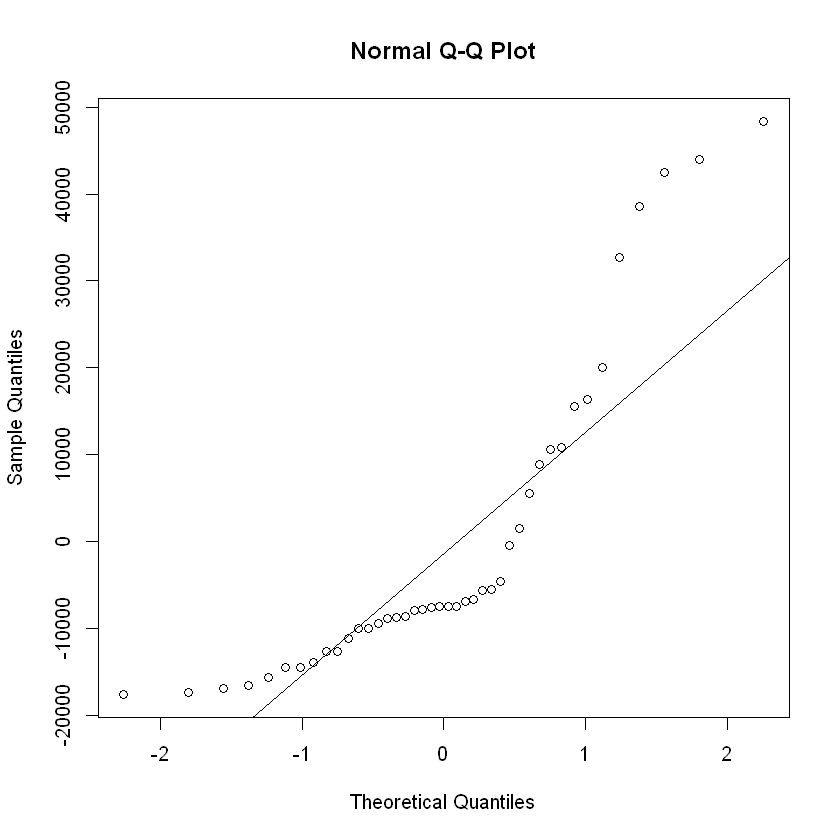

In [31]:
qqnorm(fcast.mean$residuals)
qqline(fcast.mean$residuals)

In [32]:
mean(abs(residuals(fcast.mean)))

[1] 14062.65

# Forcasting Using Naive Model

In [33]:
fcast.naive<-naive(tshouse,h=3) #try to change h to 4 and see how the interval increases
fcast.naive

     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020          10784  1214.992 20353.01  -3850.535 25418.54
2021          10784 -2748.621 24316.62  -9912.358 31480.36
2022          10784 -5790.009 27358.01 -14563.759 36131.76

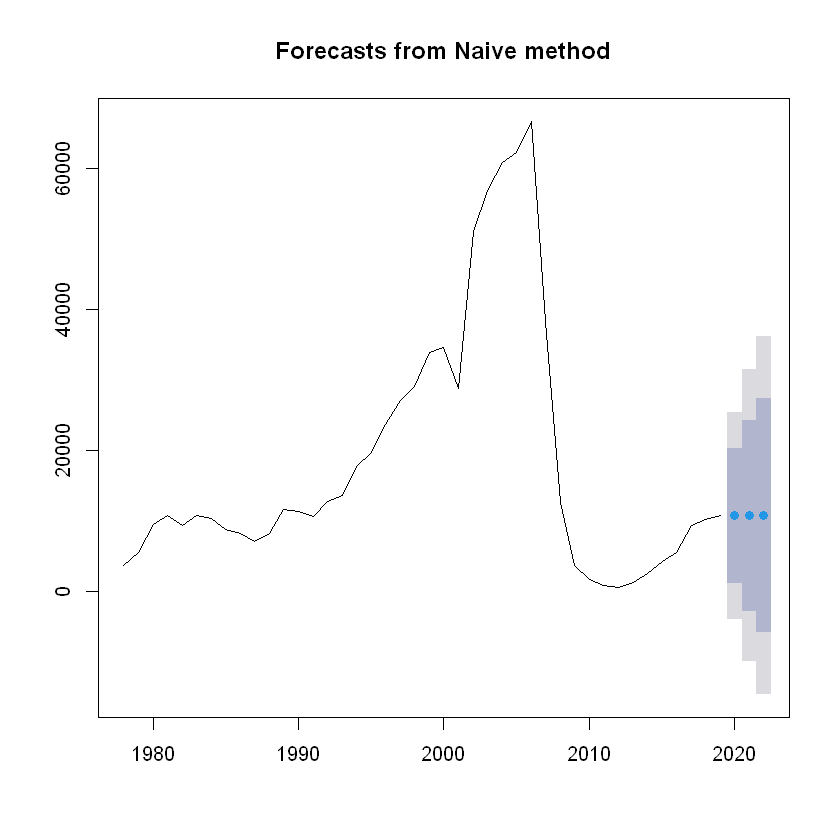

In [34]:
plot(fcast.naive)

In [35]:
summary(fcast.naive)


Forecast method: Naive method

Model Information:
Call: naive(y = tshouse, h = 3) 

Residual sd: 7466.7369 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set 170.8049 7466.737 3967.244 -7.900382 34.07645    1 0.4216754

Forecasts:
     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020          10784  1214.992 20353.01  -3850.535 25418.54
2021          10784 -2748.621 24316.62  -9912.358 31480.36
2022          10784 -5790.009 27358.01 -14563.759 36131.76


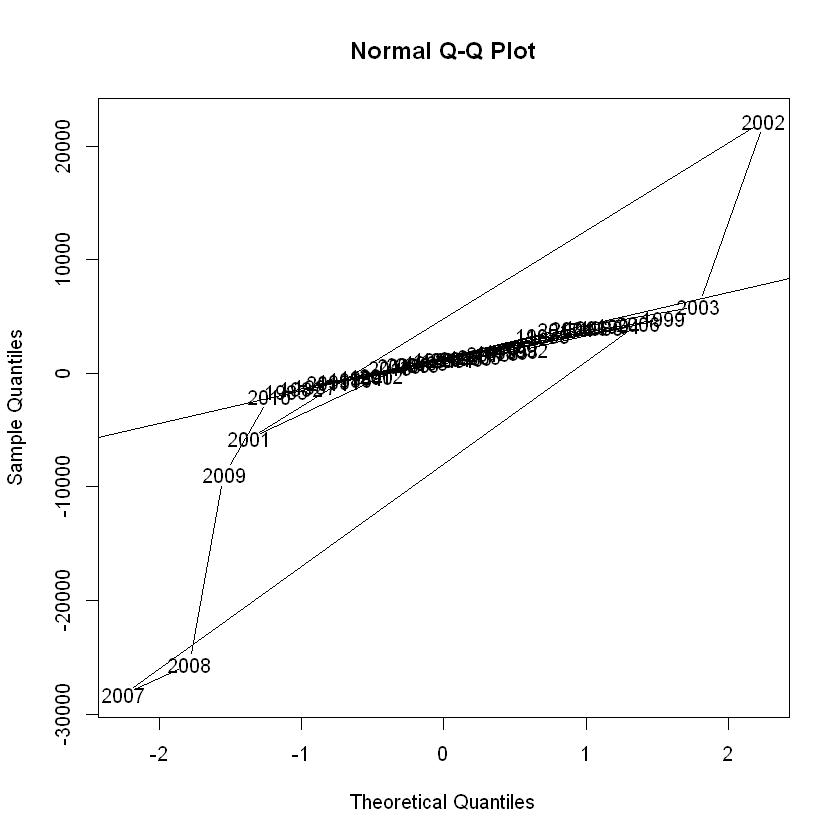

In [36]:
qqnorm(fcast.naive$residuals)
qqline(fcast.naive$residuals)

# Forecasting Using Seasonal Naive Model

In [40]:
fcast.seasonalnaive<-snaive(tshouse,h=4)
fcast.seasonalnaive

     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020          10784  1214.992 20353.01  -3850.535 25418.54
2021          10784 -2748.621 24316.62  -9912.358 31480.36
2022          10784 -5790.009 27358.01 -14563.759 36131.76
2023          10784 -8354.017 29922.02 -18485.071 40053.07

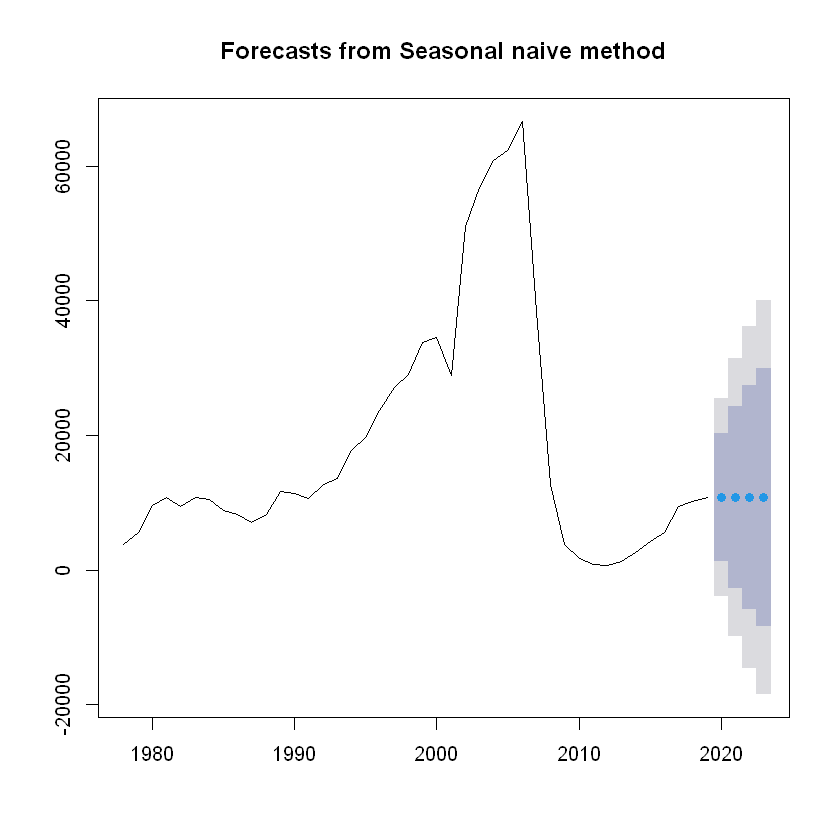

In [41]:
plot(fcast.seasonalnaive)

In [42]:
summary(fcast.seasonalnaive)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = tshouse, h = 4) 

Residual sd: 7466.7369 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE MASE      ACF1
Training set 170.8049 7466.737 3967.244 -7.900382 34.07645    1 0.4216754

Forecasts:
     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020          10784  1214.992 20353.01  -3850.535 25418.54
2021          10784 -2748.621 24316.62  -9912.358 31480.36
2022          10784 -5790.009 27358.01 -14563.759 36131.76
2023          10784 -8354.017 29922.02 -18485.071 40053.07


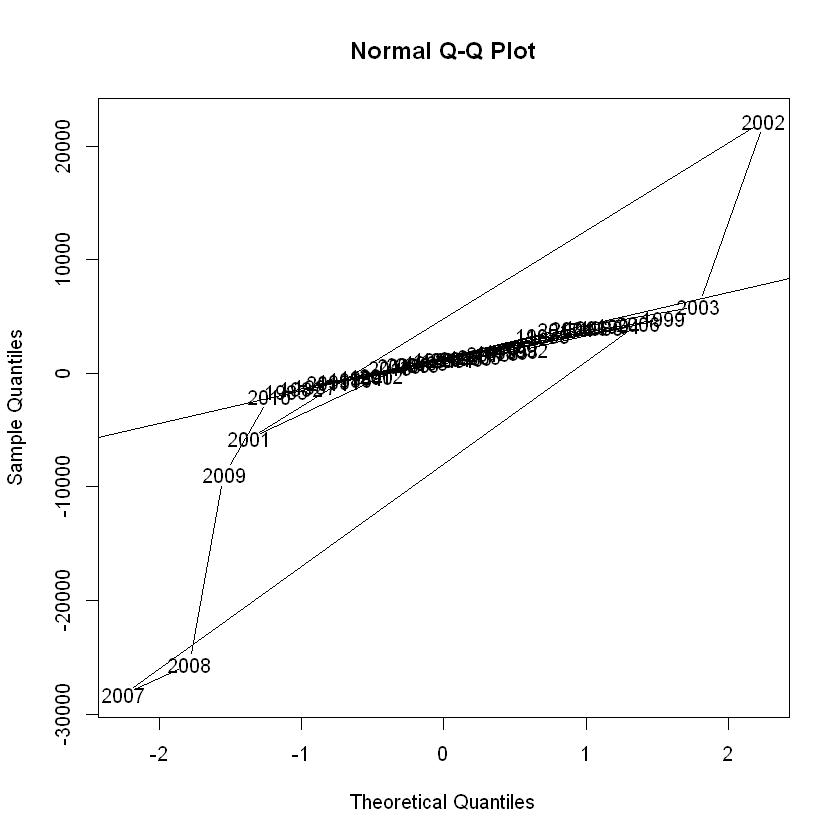

In [43]:
qqnorm(fcast.seasonalnaive$residuals)
qqline(fcast.seasonalnaive$residuals)

# Forecasting Using Simple Exponential Smoothing

In [38]:
fcast.ses<-ses(tshouse, h=3)
fcast.ses

     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020       10783.75  1093.883 20473.62  -4035.623 25603.12
2021       10783.75 -2916.483 24483.98 -10168.948 31736.45
2022       10783.75 -5994.189 27561.69 -14875.894 36443.39

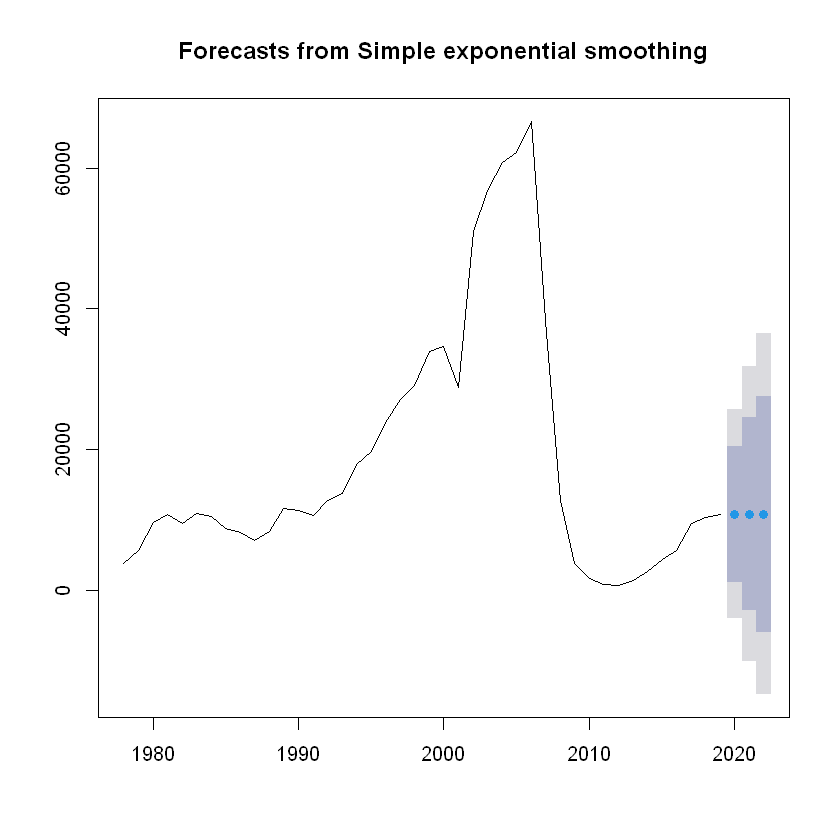

In [39]:
plot(fcast.ses)

In [40]:
summary(fcast.ses)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = tshouse, h = 3) 

  Smoothing parameters:
    alpha = 0.9995 

  Initial states:
    l = 3848.3497 

  sigma:  7561.043

     AIC     AICc      BIC 
911.1171 911.7487 916.3302 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 165.2083 7378.822 3875.789 -7.771767 33.33161 0.9769476 0.4218681

Forecasts:
     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020       10783.75  1093.883 20473.62  -4035.623 25603.12
2021       10783.75 -2916.483 24483.98 -10168.948 31736.45
2022       10783.75 -5994.189 27561.69 -14875.894 36443.39


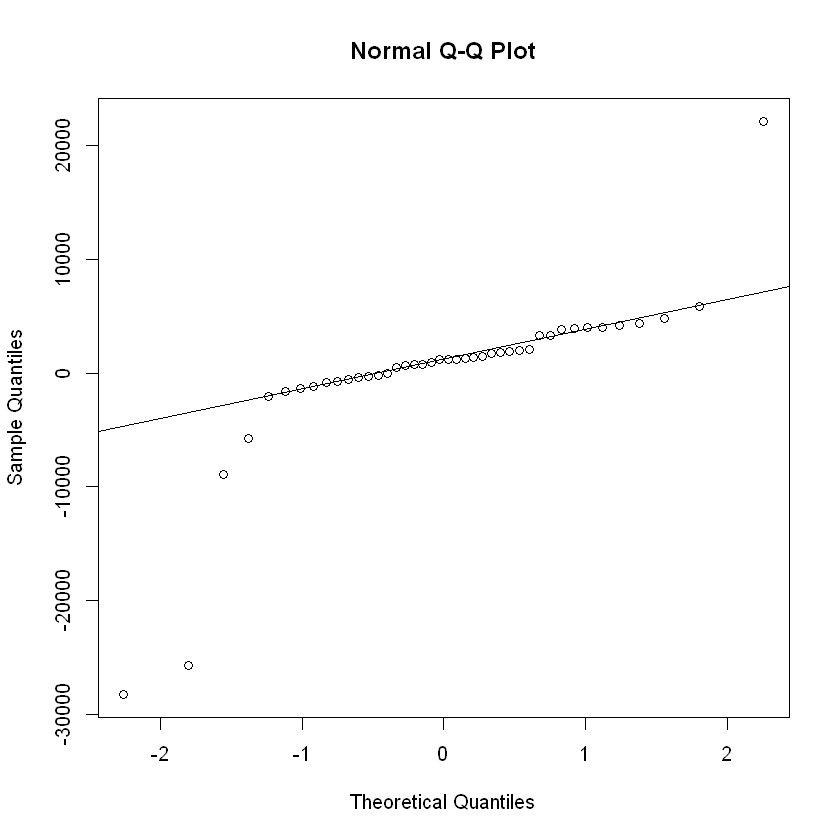

In [41]:
qqnorm(fcast.ses$residuals)
qqline(fcast.ses$residuals)

In [42]:
mean(abs(residuals(fcast.ses)))

[1] 3875.789

# Forecast Using Drift Model

     Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
2020       10954.80  1269.457 20640.15  -3857.656 25767.27
2021       11125.61 -2737.572 24988.79 -10076.297 32327.52
2022       11296.41 -5883.387 28476.22 -14977.824 37570.65

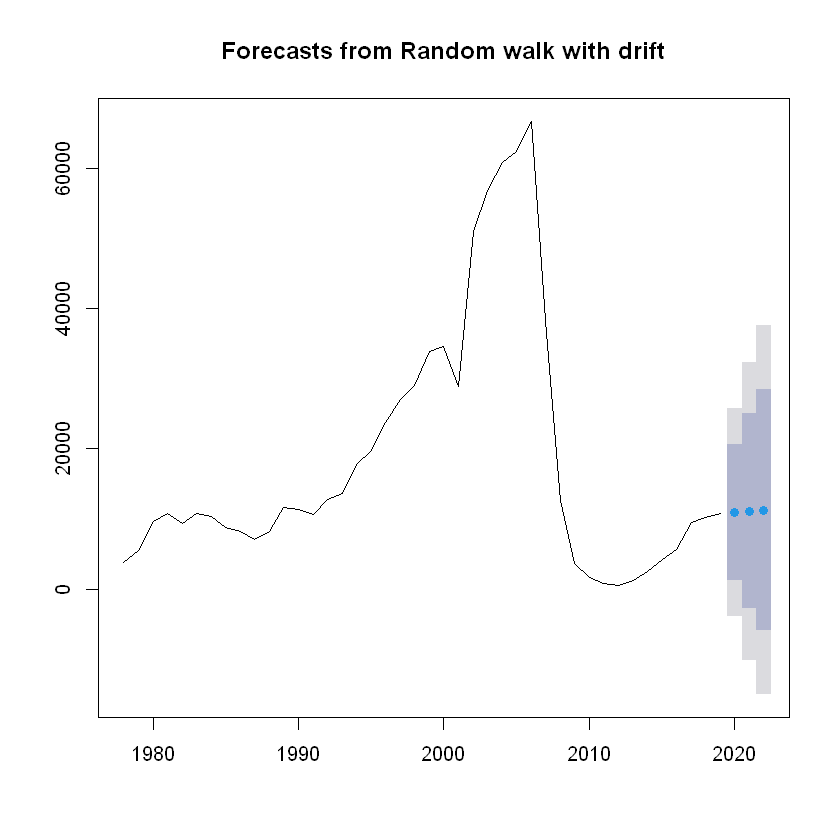

In [62]:
fcast.drift<-rwf(tshouse,h=3, drift=TRUE)
fcast.drift
plot(fcast.drift)

In [63]:
accuracy(fcast.drift)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.237844e-14,7464.783,3913.086,-11.0642,34.70801,0.9863488,0.4216754


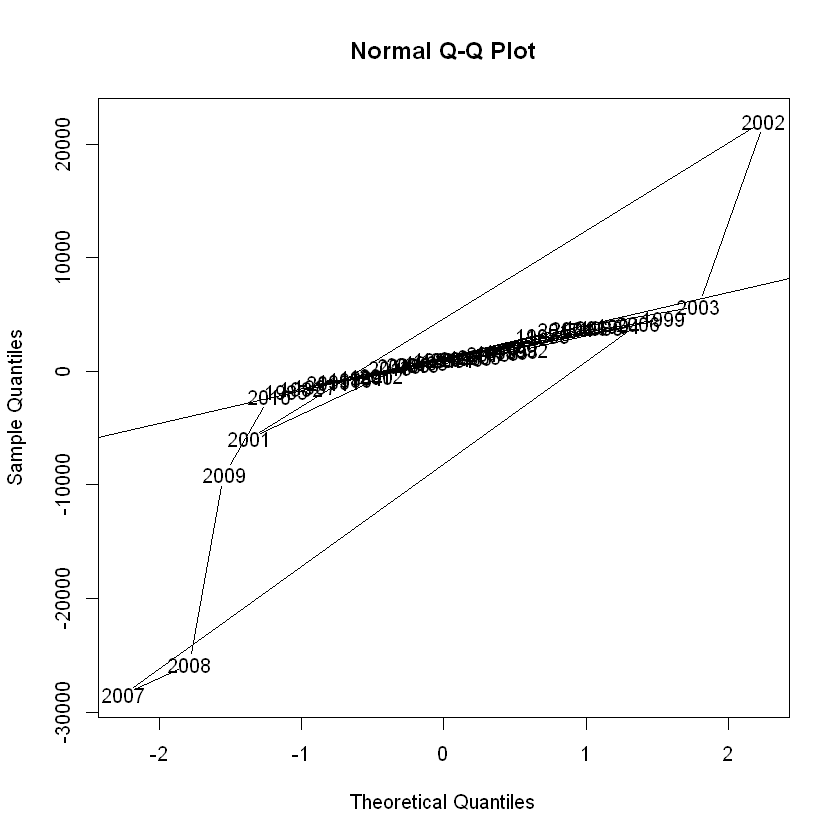

In [64]:
qqnorm(fcast.drift$residuals)
qqline(fcast.drift$residuals)

In [65]:
Box.test(fcast.drift$residuals, type='Ljung-Box')


	Box-Ljung test

data:  fcast.drift$residuals
X-squared = 7.837, df = 1, p-value = 0.005119


# Linear Model

In [67]:
houseLM <- lm(tshouse~time(tshouse))

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


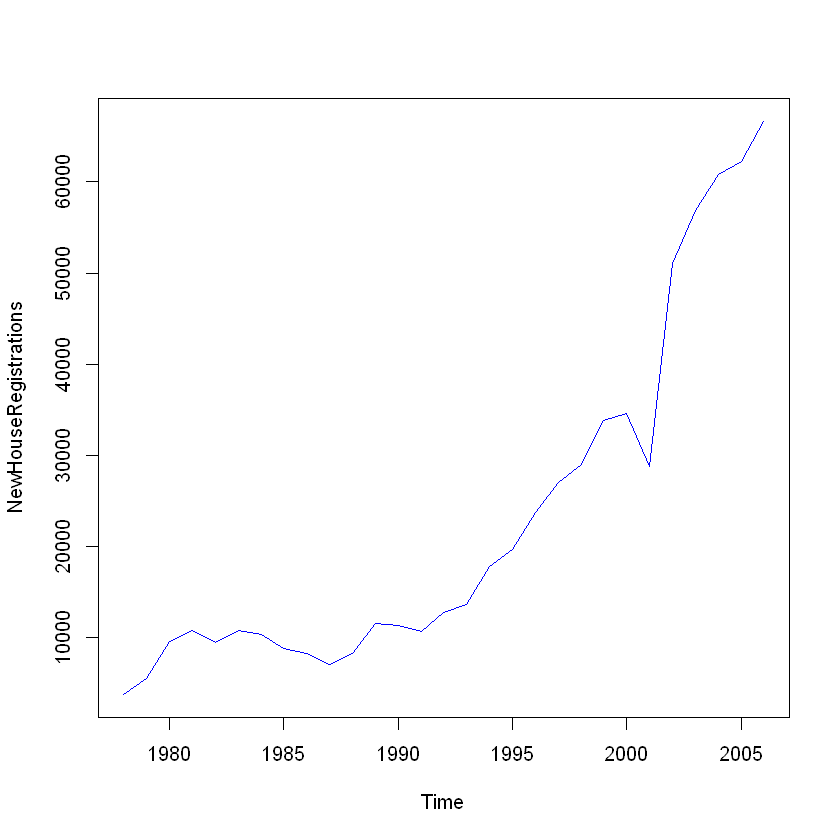

In [68]:
plot(fhouse, col='blue')
x <- as.vector(time(fhouse))
y <- predict.lm(houseLM)
lines(x, y, col='red', lw=4)

# Moving Averages

An overlay plot shows how the moving average can be used to smooth out the seasonal element:

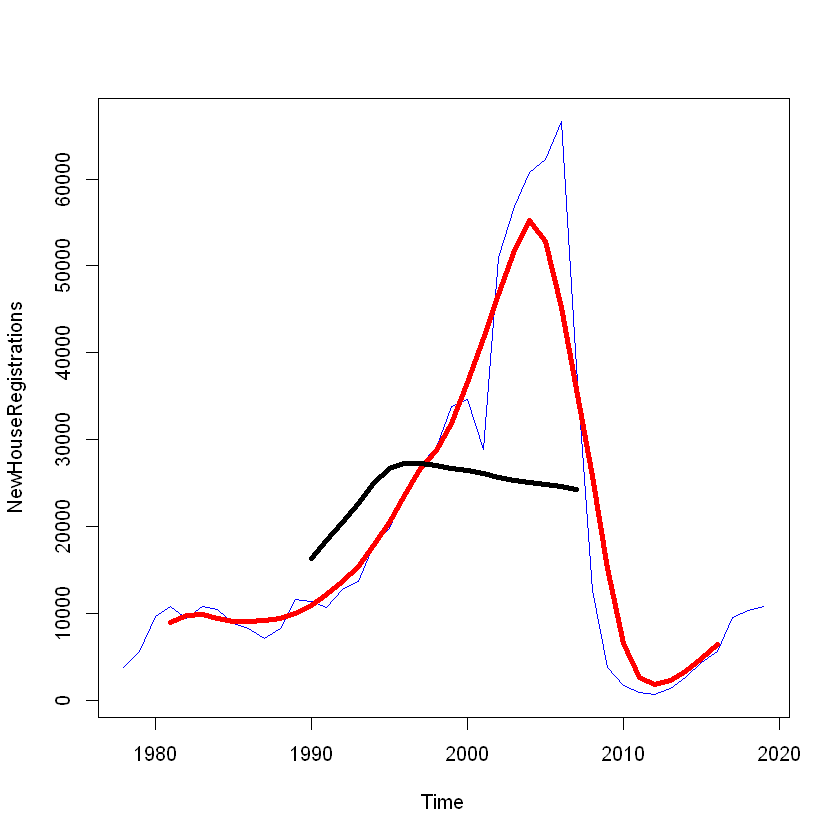

In [70]:
plot(tshouse, col='blue')
x <- as.vector(time(tshouse))
y <- ma(tshouse, order=6)
lines(x, y, col='red', lw=4)
y <- ma(tshouse, order=24)
lines(x, y, col='black', lw=4)

An overlay of the linear model with the above trendline from the moving averages looks like this:

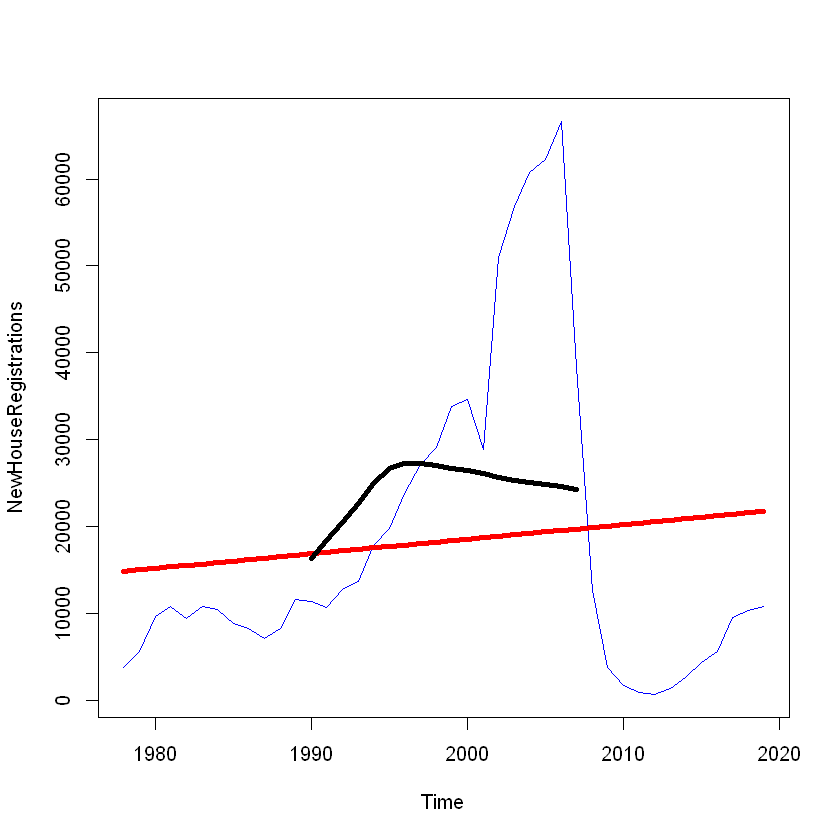

In [71]:
plot(tshouse, col='blue')
x <- as.vector(time(tshouse))
y <- predict.lm(houseLM)
lines(x, y, col='red', lw=4)
y <- ma(tshouse, order=24)
lines(x, y, col='black', lw=4)

# Logarithmic Model

In [72]:
loghouse <- log(tshouse)

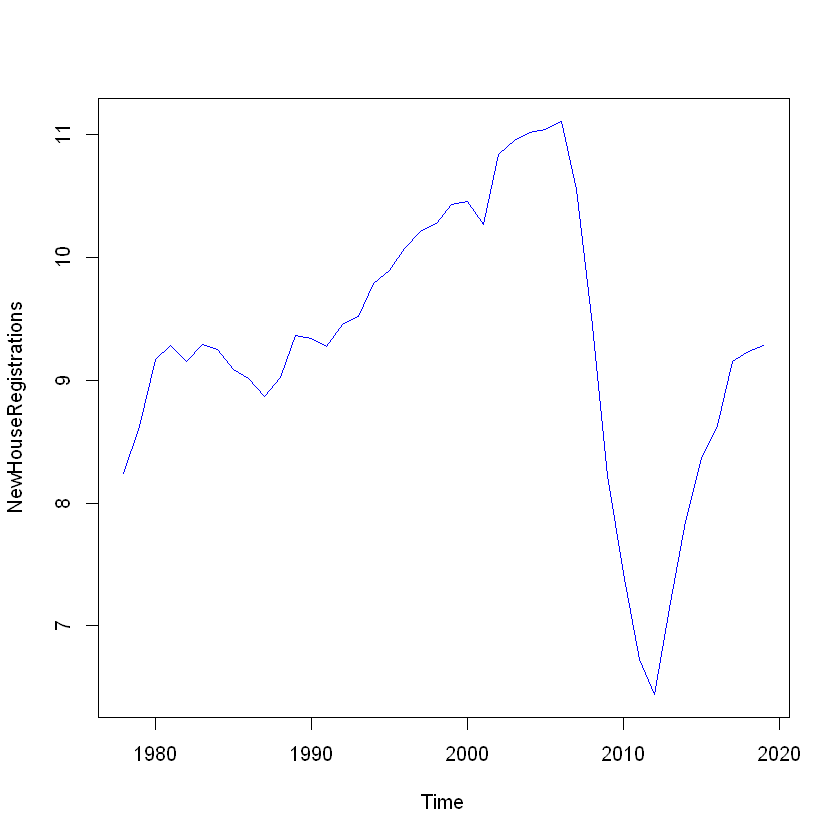

In [73]:
plot(loghouse, col='blue')
x <- as.vector(time(loghouse))
y <- predict.lm(houseLM)
lines(x, y, col='red', lw=4)

# Exponential smoothing model

- Since the time serie has level, trend and seasonal components, we usea triple exponential model, Holt-Winters exponential smoothing

- Since the fluttuations in the end of the graph are bigger than in the beginning, we use the multiplicative version
- The plot contains the confidence interval of 80 and 95%

Additive

In [74]:
fitAdd <- hw(tshouse, seasonal='additive')
summary(fitAdd)

ERROR: Error in hw(tshouse, seasonal = "additive"): The time series should have frequency greater than 1.


In [75]:
mean(abs(residuals(fitAdd)))

ERROR: Error in residuals(fitAdd): object 'fitAdd' not found


Multiplicative

In [58]:
fitMult <- hw(tshouse, seasonal='multiplicative')
autoplot(trips)+autolayer(fitMult, title="Holt Winter Multiplicative Forecast")

ERROR: Error in hw(tshouse, seasonal = "multiplicative"): The time series should have frequency greater than 1.


In [77]:
summary(fitMult)

ERROR: Error in summary(fitMult): object 'fitMult' not found


In [78]:
names(fitMult)

ERROR: Error in eval(expr, envir, enclos): object 'fitMult' not found


In [79]:
mean(abs(residuals(fitMult)))

ERROR: Error in residuals(fitMult): object 'fitMult' not found


# Esponential smooting model using Automatic model

In [44]:
fitAuto <- ets(tshouse, model='ZZZ')

In [45]:
fitAuto

ETS(M,A,N) 

Call:
 ets(y = tshouse, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 6959.6429 
    b = 274.5675 

  sigma:  0.3675

     AIC     AICc      BIC 
863.4752 865.1418 872.1635 

In [90]:
summary(fitAuto)

ETS(M,A,N) 

Call:
 ets(y = tshouse, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 6959.6429 
    b = 274.5675 

  sigma:  0.3675

     AIC     AICc      BIC 
863.4752 865.1418 872.1635 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set -184.0889 7395.984 3870.015 -14.83976 36.43003 0.975492 0.4173692


In [91]:
mean(abs(residuals(fitAuto)))

[1] 0.2659442

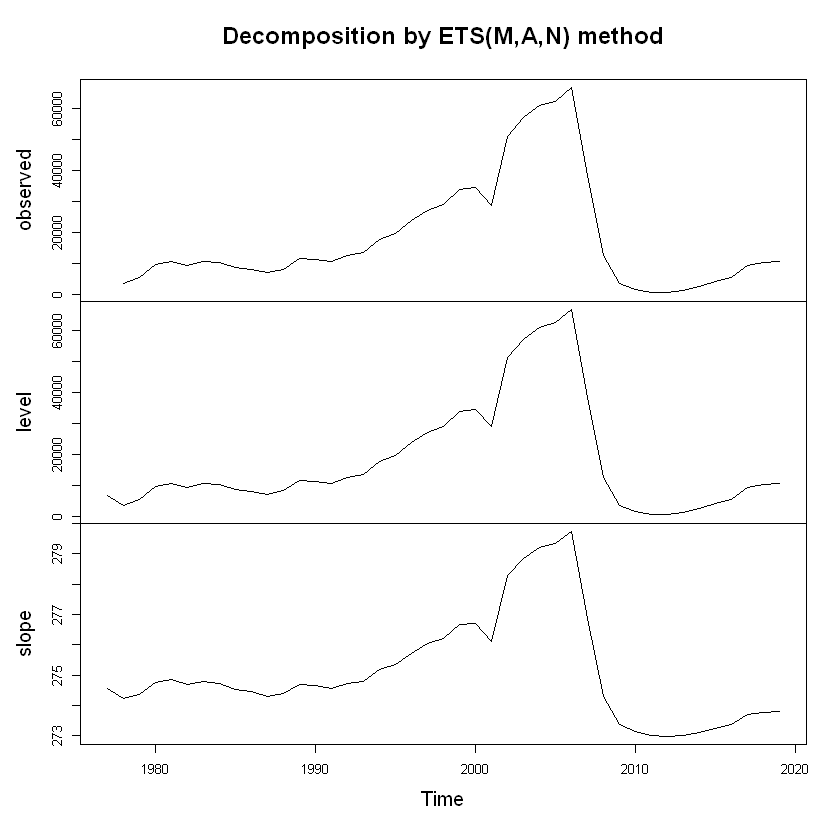

In [92]:
#plot(tshouse, col='blue')
plot(fitAuto)
#x <- as.vector(time(tshouse))
#y <- ma(fhouse, order=6)
#lines(x, y, col='red', lw=4)
#y <- ma(fhouse, order=24)
#lines(x, y, col='black', lw=4)

In [93]:
decomposition by ETS(MAN)
error: multiplicative
trend: additive 
season: none


ERROR: Error in parse(text = x, srcfile = src): <text>:1:15: unexpected symbol
1: decomposition by
                  ^


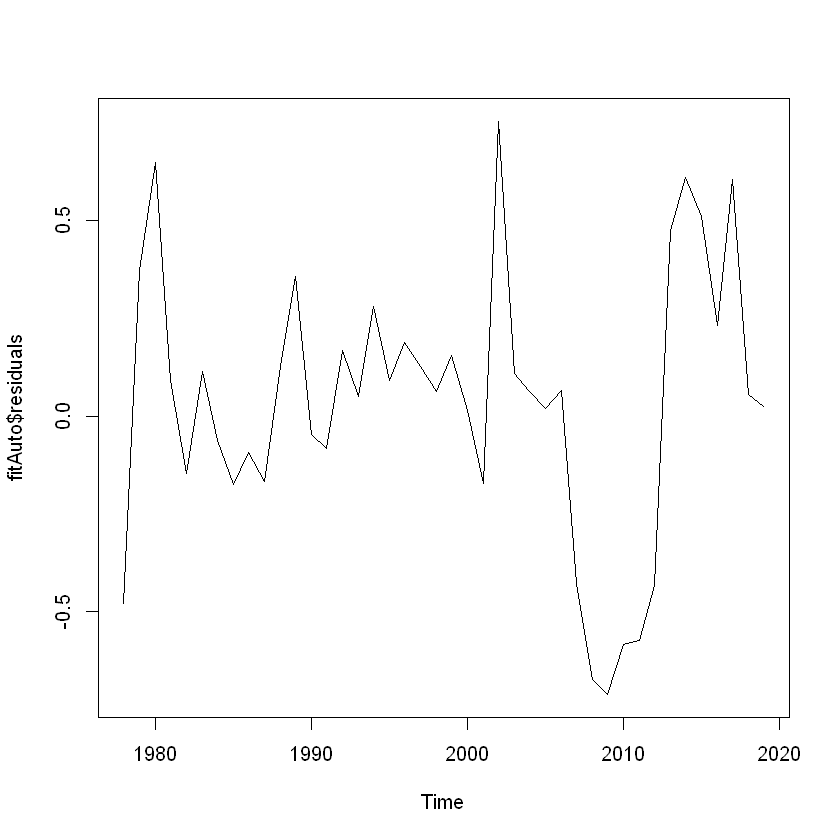

In [94]:
plot(fitAuto$residuals)

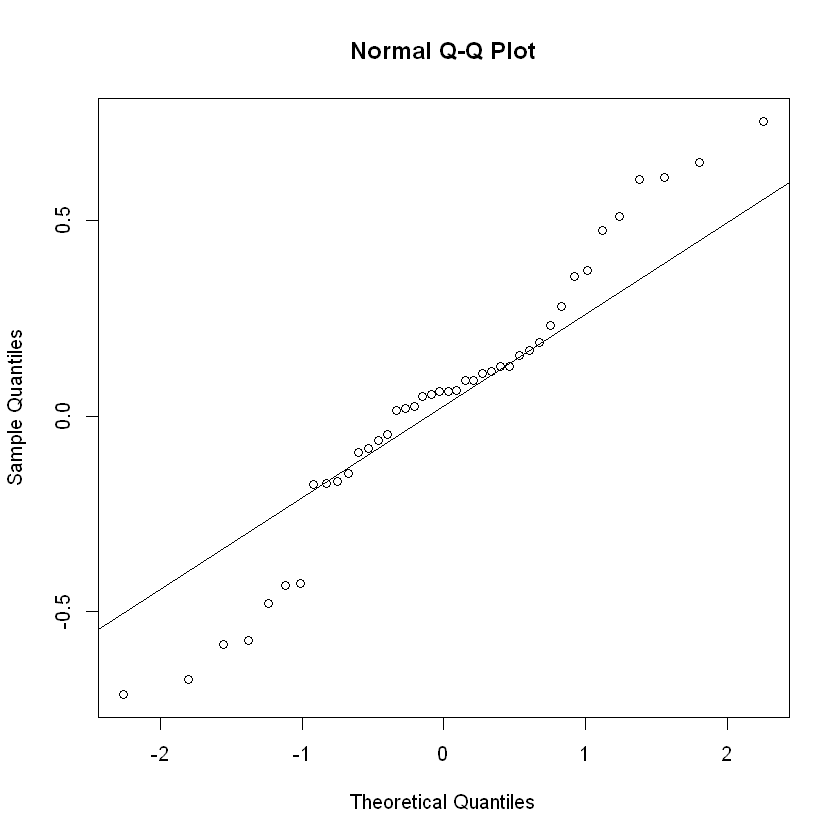

In [86]:
qqnorm(fitAuto$residuals)
qqline(fitAuto$residuals)

In [95]:
accuracy(fitAuto)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-184.0889,7395.984,3870.015,-14.83976,36.43003,0.975492,0.4173692


In [96]:
forecast(fitAuto)

     Point Forecast       Lo 80    Hi 80       Lo 95    Hi 95
2020       11057.77   5850.3987 16265.14   3093.7831 19021.76
2021       11331.56   3633.8731 19029.25   -441.0383 23104.17
2022       11605.36   1749.8726 21460.84  -3467.3064 26678.02
2023       11879.15    -18.5119 23776.82  -6316.7550 30075.06
2024       12152.95  -1755.4891 26061.38  -9118.1704 33424.06
2025       12426.74  -3505.7422 28359.22 -11939.8895 36793.37
2026       12700.54  -5297.7054 30698.78 -14825.3986 40226.47
2027       12974.33  -7151.9364 33100.60 -17806.1381 43754.80
2028       13248.12  -9084.8018 35581.05 -20907.1386 47403.39
2029       13521.92 -11110.3325 38154.17 -24149.8585 51193.70

Mean absolute residual for:<br> 

additive:       63.386199609152<br> 
multiplicative: 0.0270278125965879<br> 
ets automatic:0.0200786644284957<br> 

AIC for:<br>

additive:       406.5767 <br> 
multiplicative: 402.0749 <br> 
ets automatic : 378.8267 <br> 

# ARIMA

In [97]:
library(aTSA)


Attaching package: 'aTSA'


The following object is masked from 'package:forecast':

    forecast


The following object is masked from 'package:graphics':

    identify




In [98]:
end(tshouse)

[1] 2019    1

In [99]:
adf.test(tshouse)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -0.882   0.358
[2,]   1 -1.430   0.163
[3,]   2 -1.360   0.188
[4,]   3 -1.367   0.185
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.41   0.545
[2,]   1 -2.18   0.261
[3,]   2 -2.07   0.302
[4,]   3 -2.20   0.256
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.31   0.846
[2,]   1 -2.11   0.517
[3,]   2 -2.01   0.559
[4,]   3 -2.13   0.511
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [100]:
ndiffs(tshouse)

[1] 0

In [ ]:
dhouse<-diff(tshouse)

In [ ]:
plot(dhouse)

In [ ]:
adf.test(dhouse)

In [ ]:
ddhouse<-diff(dhouse)

In [ ]:
plot(ddhouse)

In [ ]:
adf.test(ddhouse)

In [ ]:
dddhouse<-diff(ddhouse)

In [ ]:
plot(dddhouse)

In [ ]:
adf.test(dddhouse)

# autoarima

In [47]:
library(fpp2)

In [48]:
fitAutoArima <- auto.arima(tshouse)

In [49]:
fitAutoArima

Series: tshouse 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2       mean
      1.3346  -0.4665  16791.106
s.e.  0.1315   0.1319   6985.181

sigma^2 estimated as 43317727:  log likelihood=-428.43
AIC=864.86   AICc=865.94   BIC=871.81

In [50]:
summary(fitAutoArima)

Series: tshouse 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2       mean
      1.3346  -0.4665  16791.106
s.e.  0.1315   0.1319   6985.181

sigma^2 estimated as 43317727:  log likelihood=-428.43
AIC=864.86   AICc=865.94   BIC=871.81

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 207.1252 6342.208 3464.418 -20.20197 35.95662 0.8732557
                     ACF1
Training set -0.007018081


In [51]:
accuracy(fitAutoArima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,207.1252,6342.208,3464.418,-20.20197,35.95662,0.8732557,-0.007018081


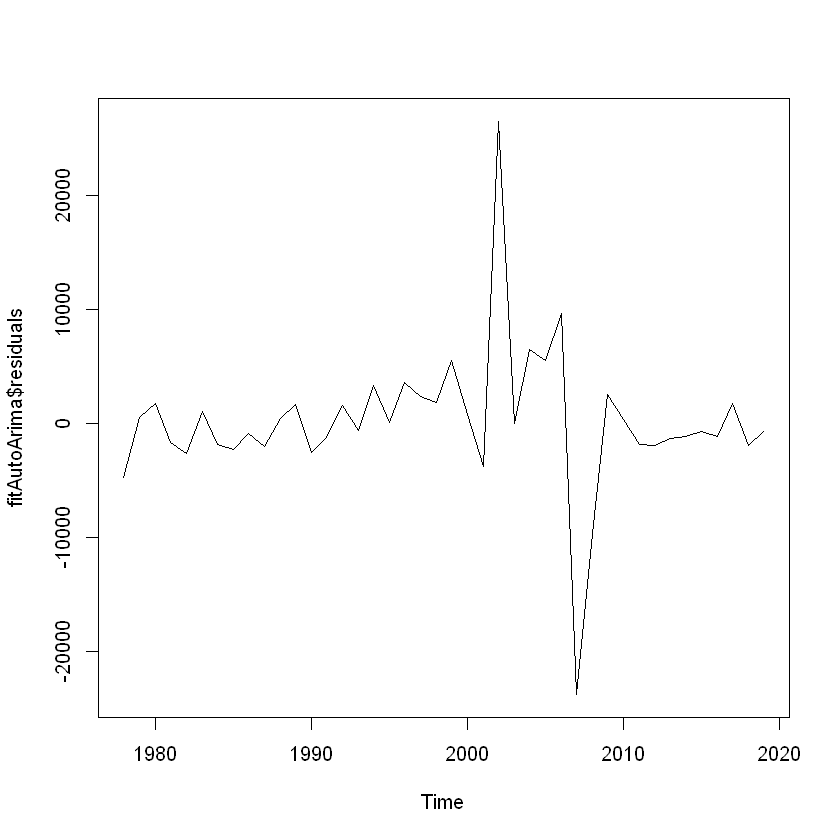

In [52]:
plot(fitAutoArima$residuals)

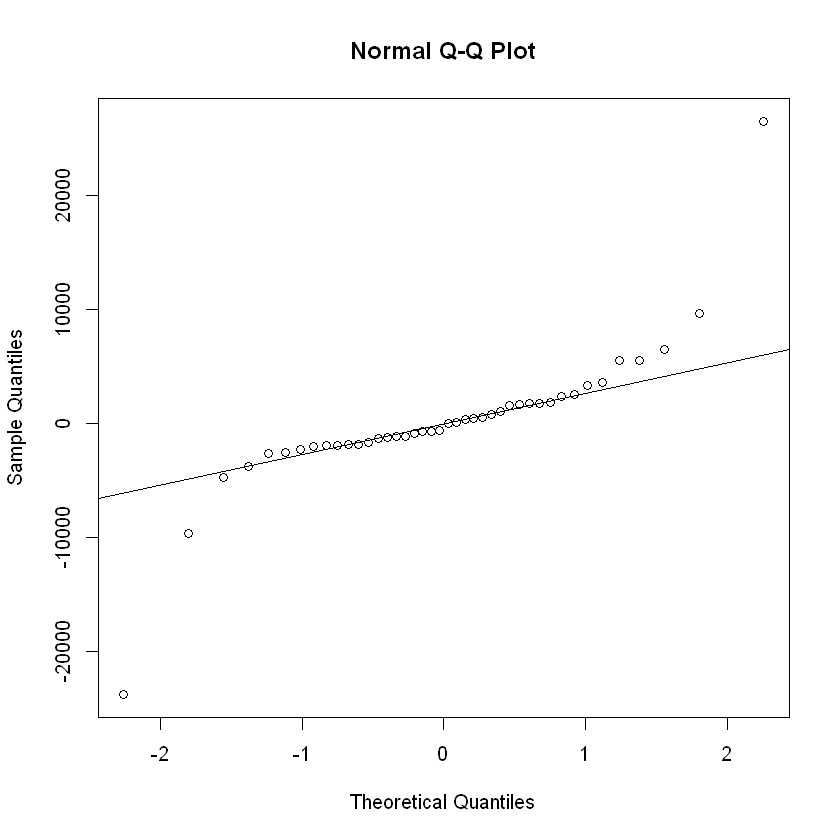

In [53]:
qqnorm(fitAutoArima$residuals)
qqline(fitAutoArima$residuals)

In [54]:
fitArima <- arima(tshouse, order=c(2,0,0))

In [55]:
summary(fitArima)


Call:
arima(x = tshouse, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.3346  -0.4665  16791.106
s.e.  0.1315   0.1319   6985.181

sigma^2 estimated as 40223604:  log likelihood = -428.43,  aic = 864.86

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 207.1252 6342.208 3464.418 -20.20197 35.95662 0.8732557
                     ACF1
Training set -0.007018081


In [56]:
forecast(fitArima,3)

     Point Forecast      Lo 80    Hi 80       Lo 95    Hi 95
2020       11818.59  3690.7213 19946.45   -611.9114 24249.09
2021       12957.23  -597.4834 26511.94  -7772.9139 33687.37
2022       13994.20 -3265.7182 31254.12 -12402.5665 40390.96